# LONDON HOUSING DATA ANALYSIS
#### Introduction

* Real Estate helps to determine and evaluate the the prices of the houses. This dataset contains the london houses and their prices as well, number of crimes that would have taken place in a certain area also the number of houses sold in a certain area as well. This since 1995




* The data is a csv file and analysis is done using pandas 
* The data will be saved and exported to power bi for good visualisations
* matplotlib will be used for some data visualisations to get the inisghts of the data 

#### Questions to answer

These Questions will be answered under phase3: of the data analysis 

* Show all the record where nummber 0f crimes = 0
* Which year had highest number of houses sold
* does the number of crimes affect the average price of house show the visuals
* how many houses were sold where number of crimes is greater than 1000
* how many houses were sold in 2001 compared to 1995
* Which area has expensive houses
* which area has highest number of houses sold
* what is the average number of houses sold in 2019
* does the number of years contribute the average price of the house
* What is the max and min number of crimes recorded per area
* show all the record where the everage prices of the houses were less than 10000
* on which day were highest number of houses sold
* how many houses were sold between 2015 to 2019
* Normalise the average price columns and the houses sold columns and create new columns for that

The questions were brought up by the arthor as a way of story telling

# Phase 1: Data Preparation

This step involves data import,it includes import of libraries that facilitate data import, analysis and visualisation.

In [1]:
import pandas as pd               #for data loading and manipulation
import numpy as np                #for stastical analysis
import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns
import matplotlib
%matplotlib inline 

C:\Users\geeth\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
na_vals = [' ', 'nan', 'Nan', '?', 'missing', 'Missing']      #the list containing all the values that are to be deemed as null values

df = pd.read_csv(r"C:\Users\geeth\Desktop\DATA ANALYSIS\LONDON_housing_data.csv")

#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#The other method inputting r doesnt matter
#import the dataset into the jupyter notebook folder you working on and copy the name of the dataset hence insert it in the parentheses

In [3]:
#view the shape of the dataset
df.shape

(13549, 6)

The dataset has 13549 rows and 6 columns

In [4]:
#view the rows of the data
df.columns.to_frame()

,0
date,date
area,area
average_price,average_price
code,code
houses_sold,houses_sold
no_of_crimes,no_of_crimes


In [5]:
#view the datatypes of the dataset
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

the date has to be converted to datetime in the phase 2 of the analysis

In [6]:
#view the non null values
df.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

no_crimes columns and houses sold seem to have the null values

# Phase 2: Data Preparation


This phase includes all the cleaning, transforming and processing of data

In [7]:
#view few rows of the dataset
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN


### Step 1: Check for all the the missing or na values in the dataset

In [7]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

dropping the na_values heavily affects the dataset, the author made the decision to drop the missing values in houses_sold, no_of_crimes will be replaced by 0

In [50]:
#drop the houses_sold na_values
df.dropna(axis='index', how='all', subset=['houses_sold'], inplace=True)

In [51]:
ave_crimes = df['no_of_crimes'].mean(axis=0)
df['no_of_crimes'].fillna(ave_crimes, inplace=True)

In [52]:
#check again the missing values
df.isnull().sum()

date                   0
area                   0
average_price          0
code                   0
houses_sold            0
no_of_crimes           0
day_name               0
month                  0
year                   0
average_price_norma    0
houses_sold_norma      0
dtype: int64

### Step 2: Check for Duplicates

In [53]:
df.duplicated().sum()

0

there are no duplicates in the data

### Step 3: check for the datatypes in the dataset to see if there is need to change the datatypes of some columns

In [54]:
#check for the datatype
df.dtypes

date                   datetime64[ns]
area                           object
average_price                   int64
code                           object
houses_sold                   float64
no_of_crimes                  float64
day_name                       object
month                          object
year                            int64
average_price_norma           float64
houses_sold_norma             float64
dtype: object

In [55]:
#chnage the date datatype column to datetime
df['date'] = pd.to_datetime(df['date'])

#check the datatype again
df.dtypes

date                   datetime64[ns]
area                           object
average_price                   int64
code                           object
houses_sold                   float64
no_of_crimes                  float64
day_name                       object
month                          object
year                            int64
average_price_norma           float64
houses_sold_norma             float64
dtype: object

In [15]:
#the date datatype has successfully changed

### Step 3: Create the month date and year columns

In [56]:
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [57]:
#view the dataset
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,1,1995,0.062492,0.000129
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,Wednesday,2,1995,0.056173,0.000053
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,Wednesday,3,1995,0.054067,0.000106
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,Saturday,4,1995,0.052687,0.000053
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,Monday,5,1995,0.057681,0.000076


the columns have been added

#### step 3.2: change the value names of months into actual month names

In [58]:
df['month'] = df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                  11:'Nov', 12:'Dec'})

In [59]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,Jan,1995,0.062492,0.000129
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,Wednesday,Feb,1995,0.056173,0.000053
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,Wednesday,Mar,1995,0.054067,0.000106
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,Saturday,Apr,1995,0.052687,0.000053
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,Monday,May,1995,0.057681,0.000076


# Phase 3: Exploratory Data Anlysis

* EDA is an approach to anaylse data inorder to summarize main characteristics of the data
* It also helps to gain better understanding of the dataset
* helps uncover relationships between different variables 
* extract the important variables for the problem being solved

#### Q1: Show all the record where nummber 0f crimes = 0

In [60]:
#view the dataset first
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,Jan,1995,0.062492,0.000129
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,Wednesday,Feb,1995,0.056173,0.000053


In [61]:
df[df['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,Monday,Jan,2001,0.194251,0.000182
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,Thursday,Feb,2001,0.135397,0.000280
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,Thursday,Mar,2001,0.129176,0.000333
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,Sunday,Apr,2001,0.140424,0.000288
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,Tuesday,May,2001,0.152701,0.000227
...,...,...,...,...,...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0,Sunday,Nov,2009,0.271911,0.000083
179,2009-12-01,city of london,411955,E09000001,16.0,0.0,Tuesday,Dec,2009,0.281510,0.000121
180,2010-01-01,city of london,464436,E09000001,20.0,0.0,Friday,Jan,2010,0.317373,0.000151
181,2010-02-01,city of london,490525,E09000001,9.0,0.0,Monday,Feb,2010,0.335200,0.000068


104 record have the number of crimes being zero

#### Q2: Which year had highest number of houses sold

In [62]:
df.groupby('year').houses_sold.max().sort_values(ascending=False)

year
2002    132163.0
2004    126778.0
2001    124849.0
2007    121246.0
2006    120679.0
2003    119798.0
1999    119652.0
2016    119302.0
2000    105431.0
1998    103581.0
1997    102709.0
2005    102289.0
1996     93515.0
2015     89783.0
2014     86320.0
2018     84466.0
2017     84327.0
2013     81041.0
2009     75376.0
2019     75079.0
1995     72640.0
2010     64635.0
2008     62969.0
2012     62396.0
2011     61631.0
Name: houses_sold, dtype: float64

more houses were sold in 2002

#### Q3: does the number of crimes affect the average price of house show the visuals

In [63]:
df[['average_price', 'no_of_crimes']].corr()

,average_price,no_of_crimes
average_price,1.000000,0.081266
no_of_crimes,0.081266,1.000000


there is week correlation there hence number of crimes have little eeect on the cost of the house

#### Q4: how many houses were sold where number of crimes is greater than 1000

In [64]:
filt = df['no_of_crimes'] > 1000
df.loc[filt, 'no_of_crimes'].count()

12976

12976 houses were sold

#### Q5: how many houses were sold in 2001 compared to 1995

In [65]:
df.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,Jan,1995,0.062492,0.000129


In [66]:
#start by houses sold in 2001
filt = (df['year'] == 2001)
df[filt].houses_sold.sum()

2661822.0

houses sold in 2001

In [67]:
df[df['year'] == 1996].houses_sold.sum()

2086378.0

vs the houses sold in 1996

#### Q6: Which area has expensive houses

In [68]:
df.groupby('area').average_price.max().sort_values(ascending=False).head()

area
kensington and chelsea    1463378
westminster               1117408
city of london             939912
camden                     881212
hammersmith and fulham     781175
Name: average_price, dtype: int64

top 5 areas with expensive houses

#### Q7: which area has highest number of houses sold

In [69]:
df.groupby('area').average_price.sum().sort_values(ascending=False).head()

area
kensington and chelsea    220960397
westminster               161716215
camden                    139100010
hammersmith and fulham    132106022
city of london            126096537
Name: average_price, dtype: int64

quantities of houses soldm

#### Q8: does the number of years contribute the average price of the house

In [70]:
df.groupby('year').average_price.mean().sort_values(ascending=False)

year
2017    469978.938889
2018    467240.674074
2019    459934.468687
2016    454884.461111
2015    421356.100000
2014    388208.392593
2013    334589.564815
2012    309409.501852
2011    294819.138889
2010    287559.164815
2008    287478.972222
2007    285944.279630
2009    259296.896296
2006    249303.109259
2005    233314.512963
2004    224604.720370
2003    205099.553704
2002    182190.731481
2001    156932.355556
2000    139979.442593
1999    114256.172222
1998    101815.855556
1997     89618.350000
1996     78904.183333
1995     75880.235185
Name: average_price, dtype: float64

This shows houses were increasing their values as the years were added

#### Q9: What is the max and min number of crimes recorded per area

In [71]:
df.groupby('area').no_of_crimes.max().sort_values(ascending=False)

area
westminster               7227.000000
lambeth                   4701.000000
camden                    4558.000000
southwark                 3821.000000
newham                    3668.000000
hackney                   3466.000000
ealing                    3401.000000
islington                 3384.000000
tower hamlets             3316.000000
croydon                   3263.000000
haringey                  3199.000000
wandsworth                3051.000000
waltham forest            2941.000000
brent                     2937.000000
barnet                    2893.000000
greenwich                 2853.000000
hillingdon                2819.000000
hounslow                  2817.000000
lewisham                  2813.000000
enfield                   2798.000000
kensington and chelsea    2778.000000
hammersmith and fulham    2645.000000
bromley                   2637.000000
redbridge                 2560.000000
south west                2158.352063
sutton                    2158.352063
south e

westminster was the highest

In [72]:
df.groupby('area').no_of_crimes.min().sort_values(ascending=False)

area
yorks and the humber      2158.352063
inner london              2158.352063
london                    2158.352063
north east                2158.352063
north west                2158.352063
england                   2158.352063
outer london              2158.352063
east of england           2158.352063
east midlands             2158.352063
south east                2158.352063
south west                2158.352063
southwark                 2158.352063
west midlands             2158.352063
westminster               2158.352063
lambeth                   2158.352063
newham                    2130.000000
camden                    2079.000000
croydon                   2031.000000
islington                 1871.000000
ealing                    1871.000000
hackney                   1870.000000
brent                     1850.000000
barnet                    1703.000000
lewisham                  1675.000000
tower hamlets             1646.000000
enfield                   1635.000000
wandswo

city of london had zero being the only area

#### Q10: show all the record where the everage prices of the houses were less than 100000

In [73]:
df.head(1)

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,Jan,1995,0.062492,0.000129


In [74]:
df[df['average_price'] < 100000]

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,Jan,1995,0.062492,0.000129
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,Wednesday,Feb,1995,0.056173,0.000053
2,1995-03-01,city of london,79121,E09000001,14.0,2158.352063,Wednesday,Mar,1995,0.054067,0.000106
3,1995-04-01,city of london,77101,E09000001,7.0,2158.352063,Saturday,Apr,1995,0.052687,0.000053
4,1995-05-01,city of london,84409,E09000001,10.0,2158.352063,Monday,May,1995,0.057681,0.000076
...,...,...,...,...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,2158.352063,Thursday,Nov,2001,0.064975,0.825867
13331,2001-12-01,england,95992,E92000001,93329.0,2158.352063,Saturday,Dec,2001,0.065596,0.706166
13332,2002-01-01,england,96215,E92000001,71678.0,2158.352063,Tuesday,Jan,2002,0.065749,0.542345
13333,2002-02-01,england,96676,E92000001,77131.0,2158.352063,Friday,Feb,2002,0.066064,0.583605


#### Q11: on which day were highest number of houses sold

In [75]:
df.groupby('day_name').houses_sold.sum().sort_values(ascending=False)

day_name
Thursday     7970531.0
Wednesday    7570749.0
Friday       7512736.0
Monday       7452363.0
Tuesday      7373678.0
Sunday       7258970.0
Saturday     7254664.0
Name: houses_sold, dtype: float64

most houses were sold Thursday

#### Q12: how many houses were sold between 2015 to 2019

In [76]:
filt = (df['year'] > 2015) & (df['year']<2019)
df[filt].houses_sold.sum()

5778043.0

the houses sold between the given interval

#### Q13: Normalise the average price columns and the houses sold columns and create new columns for that 

In [77]:
df['average_price_norma'] = df['average_price']/df['average_price'].max()
df['houses_sold_norma'] = df['houses_sold']/df['houses_sold'].max()

In [78]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,day_name,month,year,average_price_norma,houses_sold_norma
0,1995-01-01,city of london,91449,E09000001,17.0,2158.352063,Sunday,Jan,1995,0.062492,0.000129
1,1995-02-01,city of london,82203,E09000001,7.0,2158.352063,Wednesday,Feb,1995,0.056173,0.000053


the data above has been normalised looking at the columns

# Phase 4: Data Visualisation

* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### 4.1: Max Houses Sold per Year

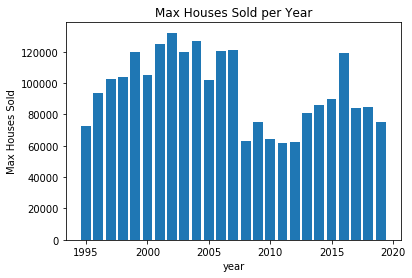

In [79]:


# perform the groupby operation and sort the result in descending order
max_houses_sold = df.groupby('year').houses_sold.max().sort_values(ascending=False)

# plot the result as a bar chart
plt.bar(max_houses_sold.index, max_houses_sold.values)
plt.xlabel('year')
plt.ylabel('Max Houses Sold')
plt.title('Max Houses Sold per Year')
plt.show()


##### * **key takeaway:** 2002 had more number of houses sold, and more houses were sold in the early years

### 4.2: Correlation Matrix: Average Price vs. Number of Crimes

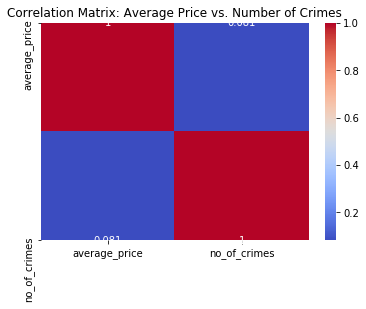

In [80]:
import seaborn as sns

# assuming `df` is the pandas dataframe you are working with

# calculate the correlation matrix
corr_matrix = df[['average_price', 'no_of_crimes']].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Average Price vs. Number of Crimes')
plt.show()


##### * **key takeaway:** number of crimes barely aafect the average price

### 4.3: Total Average Price by Area

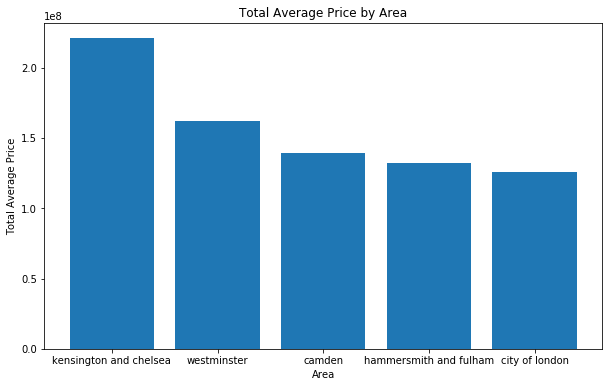

In [81]:


# perform the groupby operation and sort the result in descending order
total_price_by_area = df.groupby('area').average_price.sum().sort_values(ascending=False).head()

# plot the result as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(total_price_by_area.index, total_price_by_area.values)
plt.xlabel('Area')
plt.ylabel('Total Average Price')
plt.title('Total Average Price by Area')
plt.show()


##### * **key takeaway:** kensington and chelsea have more prices or more expensive in the top 5 list

### 4.4: Max Average Price by Area

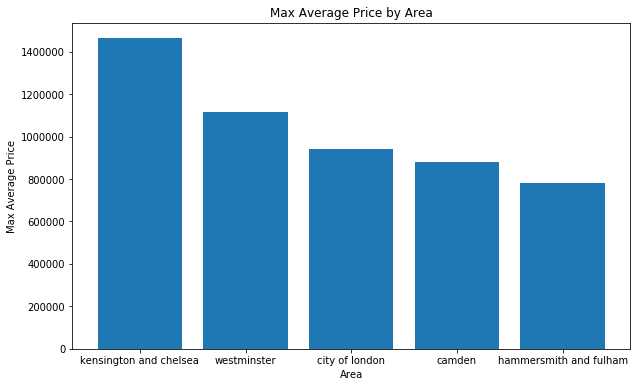

In [82]:
import matplotlib.pyplot as plt

# assuming `df` is the pandas dataframe you are working with

# perform the groupby operation and sort the result in descending order
fig, ax = plt.subplots(figsize=(10, 6))
max_price_by_area = df.groupby('area').average_price.max().sort_values(ascending=False).head()

# plot the result as a bar chart
plt.bar(max_price_by_area.index, max_price_by_area.values)

plt.xlabel('Area')
plt.ylabel('Max Average Price')
plt.title('Max Average Price by Area')
plt.show()


### 4.5: Max Number of Crimes by Area

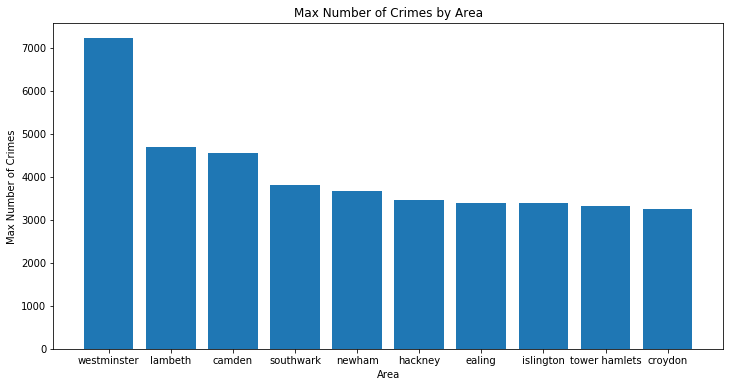

In [83]:


# perform the groupby operation and sort the result in descending order
fig, ax = plt.subplots(figsize=(12, 6))
max_crimes_by_area = df.groupby('area').no_of_crimes.max().sort_values(ascending=False).head(10)

# plot the result as a bar chart
plt.bar(max_crimes_by_area.index, max_crimes_by_area.values)
plt.xlabel('Area')
plt.ylabel('Max Number of Crimes')
plt.title('Max Number of Crimes by Area')
plt.show()


##### * **key takeaway:** more crimes have occured inwestminster

### 4.6: Mean average price by year

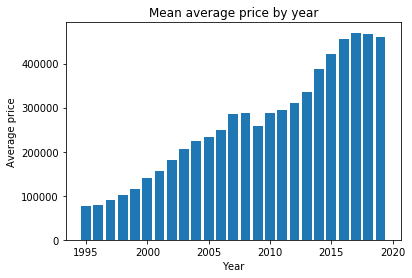

In [84]:


grouped_df = df.groupby('year').average_price.mean().sort_values(ascending=False)
plt.bar(grouped_df.index, grouped_df.values)
plt.xlabel('Year')
plt.ylabel('Average price')
plt.title('Mean average price by year')
plt.show()


##### * **key takeaway:** price of houses increase as years increase